# **Time Series Weather Forcasting**

In [39]:
# time series library import 
import os # path
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
import matplotlib as mpl

In [40]:
# managing figure size in the begining of the code 
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['axes.grid'] = False

# Import the Weather dataset

In [41]:
# import the dataset
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip' , 
    fname= 'jena_climate_2009_2016.csv.zip' , 
    extract=True
)

csv_path , _ = os.path.splitext(zip_path)

In [42]:
# read the data in pandas dataframe
df = pd.read_csv(csv_path) 
# write the csv file 
df.to_csv('jena_climate_2009_2016.csv')

In [43]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [44]:
df.shape

(420551, 15)

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420551 entries, 0 to 420550
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420551 non-null  object 
 1   p (mbar)         420551 non-null  float64
 2   T (degC)         420551 non-null  float64
 3   Tpot (K)         420551 non-null  float64
 4   Tdew (degC)      420551 non-null  float64
 5   rh (%)           420551 non-null  float64
 6   VPmax (mbar)     420551 non-null  float64
 7   VPact (mbar)     420551 non-null  float64
 8   VPdef (mbar)     420551 non-null  float64
 9   sh (g/kg)        420551 non-null  float64
 10  H2OC (mmol/mol)  420551 non-null  float64
 11  rho (g/m**3)     420551 non-null  float64
 12  wv (m/s)         420551 non-null  float64
 13  max. wv (m/s)    420551 non-null  float64
 14  wd (deg)         420551 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


In [47]:
# print all the columns 
pd.set_option('display.max_rows' , None)

In [48]:
df.head(20)


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
6,01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.8,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.5
7,01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.4,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.6
8,01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.8,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.5
9,01.01.2009 01:40:00,996.53,-8.43,264.99,-9.34,93.1,3.23,3.00,0.22,1.88,3.02,1309.85,0.59,0.88,185.0


In [49]:
# select the data based on the date time column for every 2 hours interval
# Slice [Start:Stop:Step] , starting from index 5 take every 6th record.
df= df[11::12] # 12 means 2 hours
df.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
35,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
47,01.01.2009 08:00:00,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
59,01.01.2009 10:00:00,1000.27,-7.04,266.10,-8.17,91.6,3.60,3.30,0.30,2.05,3.29,1307.76,1.45,3.00,292.6
71,01.01.2009 12:00:00,1000.30,-6.87,266.27,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.4
83,01.01.2009 14:00:00,999.81,-5.94,267.24,-7.43,89.1,3.92,3.49,0.43,2.17,3.49,1301.67,1.25,2.00,144.0
95,01.01.2009 16:00:00,999.94,-5.40,267.76,-6.86,89.4,4.08,3.65,0.43,2.27,3.65,1299.17,1.40,2.13,145.5
107,01.01.2009 18:00:00,1000.16,-5.25,267.90,-6.75,89.1,4.13,3.68,0.45,2.29,3.68,1298.68,0.55,1.00,183.7
119,01.01.2009 20:00:00,1000.22,-4.90,268.24,-6.38,89.3,4.24,3.79,0.45,2.36,3.78,1297.05,0.68,1.13,195.2


In [50]:
# select the data based on the date time column for every 2 hours interval
# Slice [Start:Stop:Step] , starting from index 5 take every 6th record.
df_30 = df[2::3] # 12 means 2 hours
df_30.head(10)

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
35,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.00
71,01.01.2009 12:00:00,1000.30,-6.87,266.27,-8.28,89.6,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40
107,01.01.2009 18:00:00,1000.16,-5.25,267.90,-6.75,89.1,4.13,3.68,0.45,2.29,3.68,1298.68,0.55,1.00,183.70
143,02.01.2009 00:00:00,999.59,-4.54,268.65,-5.46,93.2,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00
179,02.01.2009 06:00:00,998.00,-4.43,268.88,-4.94,96.2,4.39,4.23,0.17,2.64,4.23,1291.66,0.81,2.13,40.88
215,02.01.2009 12:00:00,998.91,-3.12,270.13,-4.50,90.1,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
251,02.01.2009 18:00:00,1000.74,-3.07,270.03,-4.14,92.3,4.87,4.49,0.37,2.80,4.49,1288.58,2.97,4.63,12.56
287,03.01.2009 00:00:00,1002.32,-4.71,268.27,-6.09,90.0,4.30,3.87,0.43,2.41,3.86,1298.79,1.42,1.88,16.85
323,03.01.2009 06:00:00,1001.29,-8.20,264.86,-9.05,93.5,3.29,3.07,0.21,1.91,3.07,1314.93,0.47,1.75,221.40
359,03.01.2009 12:00:00,999.02,-5.96,267.28,-8.72,80.7,3.91,3.16,0.75,1.97,3.16,1300.90,1.31,1.88,213.90


In [51]:
df.shape

(35045, 15)

In [52]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
35,997.71,-9.67,263.66,-10.62,92.7,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.0
47,999.17,-8.10,265.12,-9.05,92.8,3.31,3.07,0.24,1.92,3.08,1311.65,0.72,1.25,213.9
59,1000.27,-7.04,266.10,-8.17,91.6,3.60,3.30,0.30,2.05,3.29,1307.76,1.45,3.00,292.6


In [53]:
df.columns

Index(['p (mbar)', 'T (degC)', 'Tpot (K)', 'Tdew (degC)', 'rh (%)',
       'VPmax (mbar)', 'VPact (mbar)', 'VPdef (mbar)', 'sh (g/kg)',
       'H2OC (mmol/mol)', 'rho (g/m**3)', 'wv (m/s)', 'max. wv (m/s)',
       'wd (deg)'],
      dtype='object')

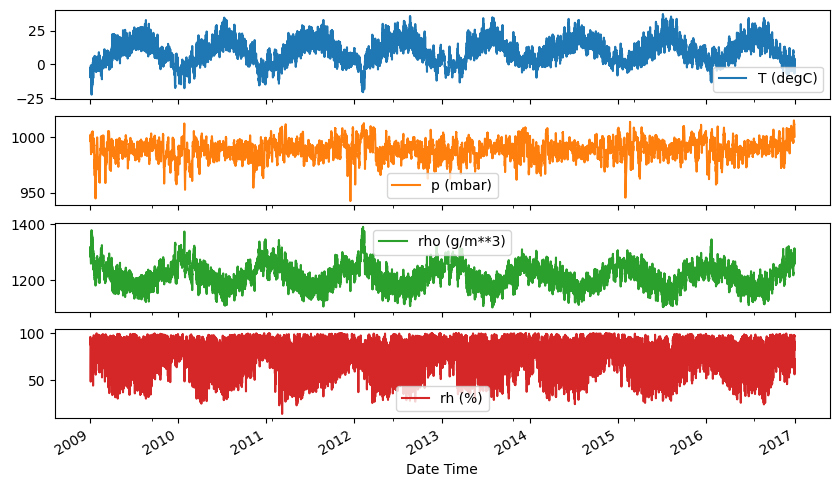

In [54]:
# let's plot the data
plot_cols = ['T (degC)' , 'p (mbar)','rho (g/m**3)','rh (%)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True) 

In [56]:
import plotly.express as px

# lets plot the same plot in plotly
fig = px.line(df , x = date_time , y = 'T (degC)')
fig.show()

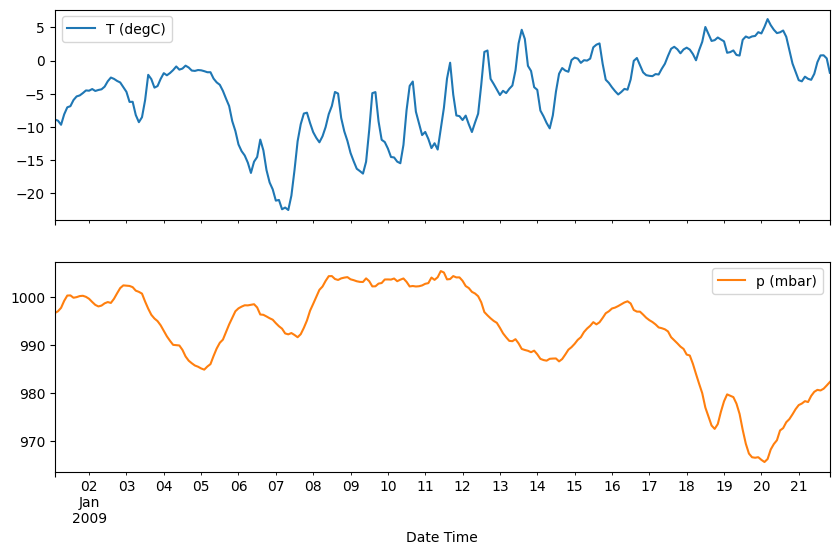

In [57]:
# let's plot the data
plot_cols = ['T (degC)' , 'p (mbar)']
plot_features = df[plot_cols][:250]
plot_features.index = date_time[:250] # 2.5 hours
_ = plot_features.plot(subplots=True) 

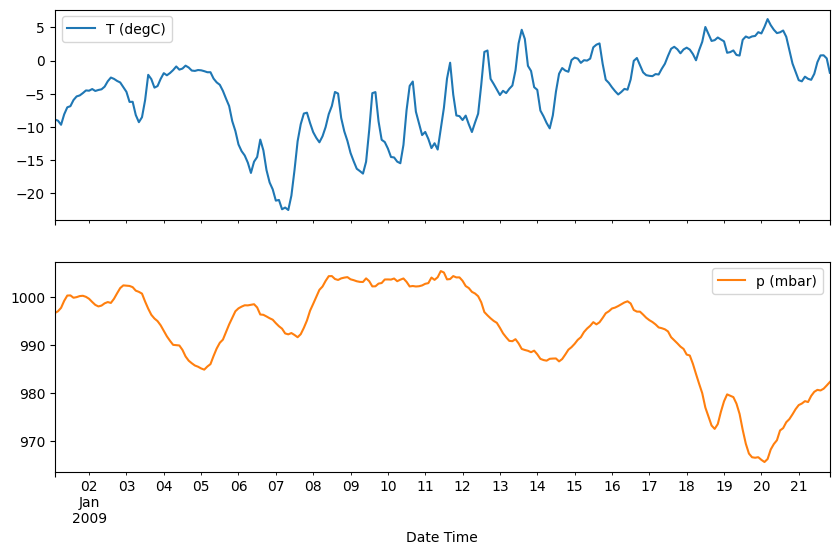

In [58]:
# let's plot only the first 500 hours dataset which is equal to 250 records
plot_cols = ['T (degC)' , 'p (mbar)']
plot_features = df[plot_cols][:250]
plot_features.index = date_time[:250] # 2.5 hours
_ = plot_features.plot(subplots=True) 

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

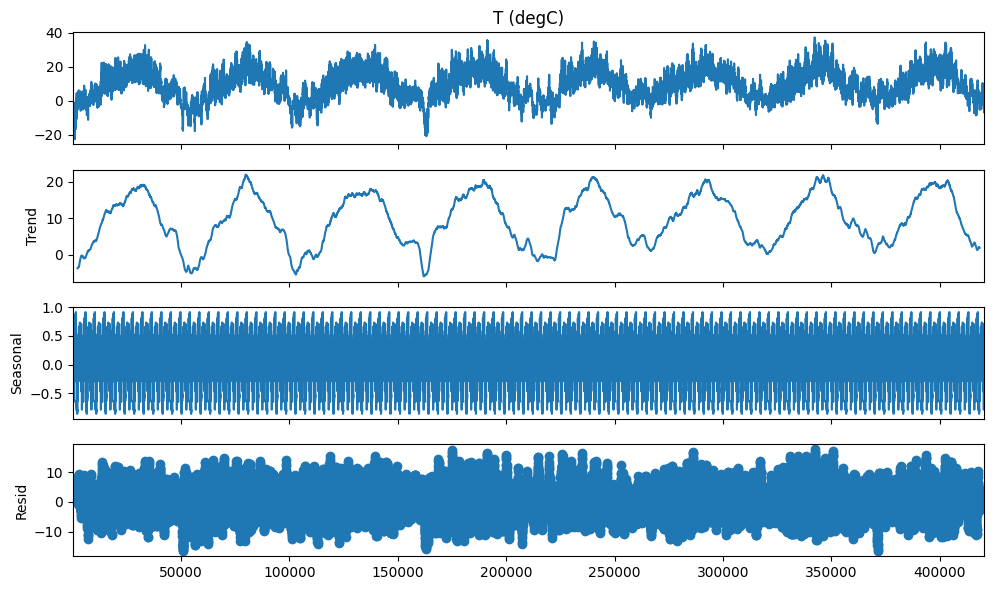

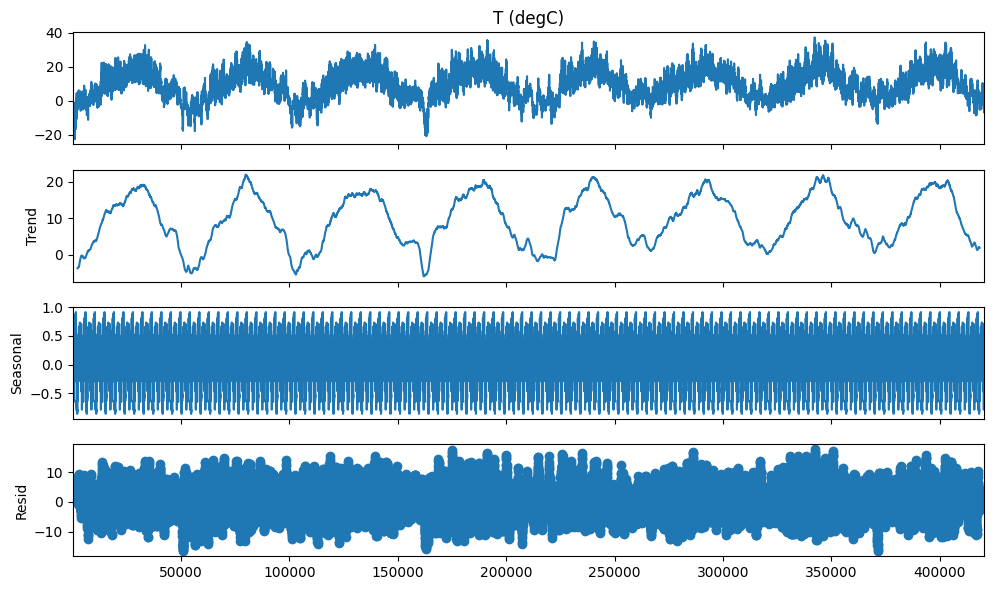

In [64]:
# lets decompose the data into trend , seasonality and noise 
# We will use the seasonal decompose function from statsmodel library
decompose = seasonal_decompose(df['T (degC)'] , model = 'additive' , period=365)
decompose.plot()

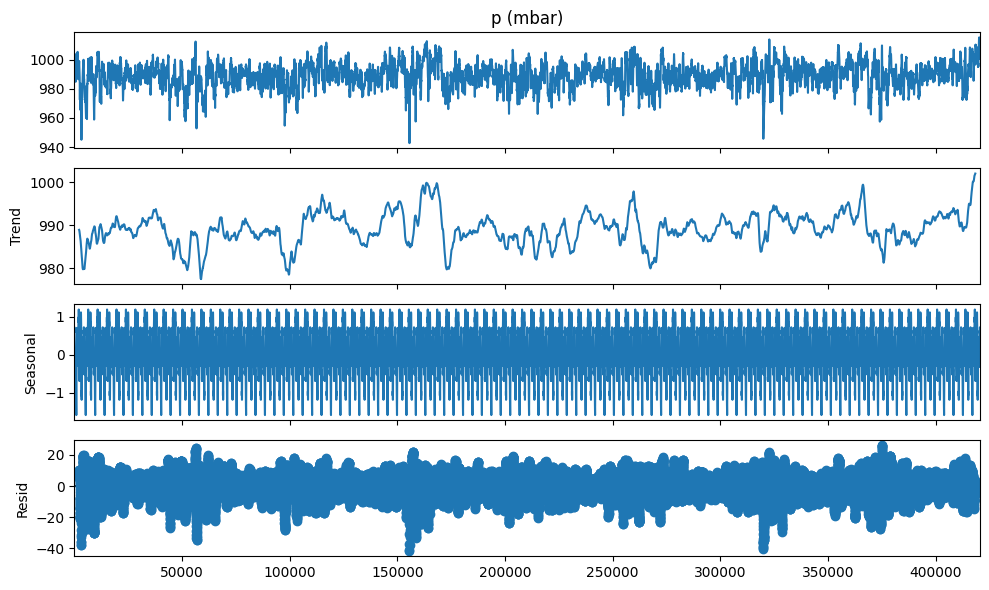

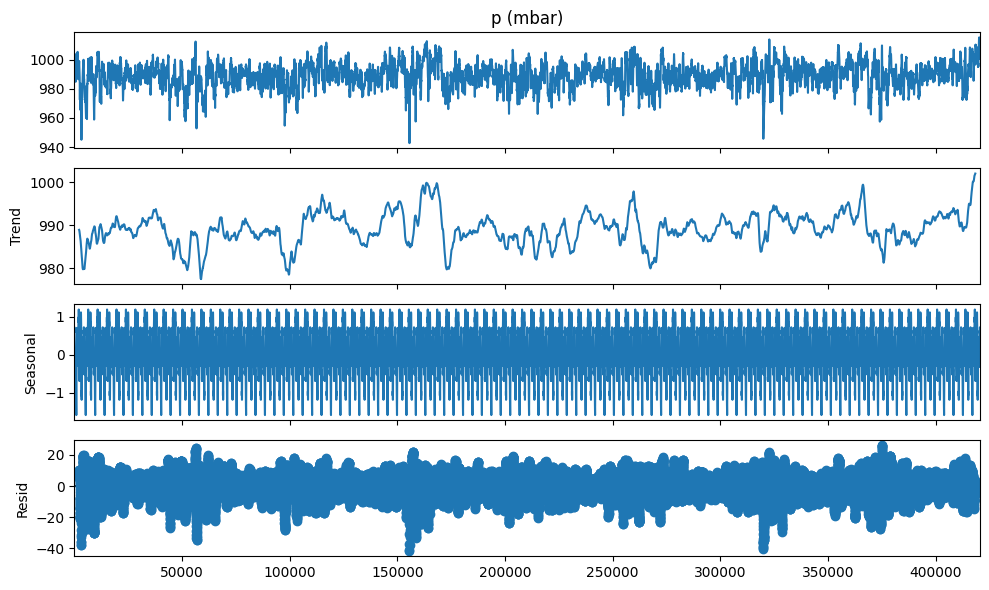

In [65]:
# lets decompose the data into trend , seasonality and noise 
# We will use the seasonal decompose function from statsmodel library
decompose = seasonal_decompose(df['p (mbar)'] , model = 'additive' , period=365)
decompose.plot()

In [68]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,35045.000000,35045.000000,35045.000000,35045.000000,35045.00000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000
mean,989.213079,9.450335,283.492908,4.955012,76.00602,13.577314,9.532714,4.044542,6.021744,9.639148,1216.063165,2.128639,2.961995,174.660533
std,8.353850,8.425301,8.506133,6.729168,16.48344,7.743076,4.181965,4.902793,2.654692,4.233082,39.978039,1.542289,75.598740,86.707469
min,942.650000,-22.500000,251.220000,-24.550000,13.88000,0.990000,0.830000,0.000000,0.520000,0.830000,1102.460000,0.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.440000,0.240000,65.15000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.200000
50%,989.570000,9.430000,283.480000,5.220000,79.30000,11.830000,8.860000,2.180000,5.600000,8.970000,1213.820000,1.760000,2.960000,198.100000
75%,994.720000,15.490000,289.550000,10.080000,89.50000,17.620000,12.360000,5.300000,7.810000,12.490000,1242.800000,2.840000,4.730000,233.600000
max,1015.160000,37.280000,311.210000,22.190000,100.00000,63.770000,26.790000,46.010000,17.130000,27.250000,1391.410000,13.500000,23.500000,360.000000


In [66]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

In [69]:
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
count,35045.000000,35045.000000,35045.000000,35045.000000,35045.00000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000
mean,989.213079,9.450335,283.492908,4.955012,76.00602,13.577314,9.532714,4.044542,6.021744,9.639148,1216.063165,2.128639,2.961995,174.660533
std,8.353850,8.425301,8.506133,6.729168,16.48344,7.743076,4.181965,4.902793,2.654692,4.233082,39.978039,1.542289,75.598740,86.707469
min,942.650000,-22.500000,251.220000,-24.550000,13.88000,0.990000,0.830000,0.000000,0.520000,0.830000,1102.460000,0.000000,-9999.000000,0.000000
25%,984.200000,3.360000,277.440000,0.240000,65.15000,7.770000,6.220000,0.870000,3.920000,6.290000,1187.470000,0.990000,1.760000,125.200000
50%,989.570000,9.430000,283.480000,5.220000,79.30000,11.830000,8.860000,2.180000,5.600000,8.970000,1213.820000,1.760000,2.960000,198.100000
75%,994.720000,15.490000,289.550000,10.080000,89.50000,17.620000,12.360000,5.300000,7.810000,12.490000,1242.800000,2.840000,4.730000,233.600000
max,1015.160000,37.280000,311.210000,22.190000,100.00000,63.770000,26.790000,46.010000,17.130000,27.250000,1391.410000,13.500000,23.500000,360.000000


In [70]:
wv = df['max. wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

In [72]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
p (mbar),35045.0,989.213079,8.353850,942.65,984.20,989.57,994.72,1015.16
T (degC),35045.0,9.450335,8.425301,-22.50,3.36,9.43,15.49,37.28
Tpot (K),35045.0,283.492908,8.506133,251.22,277.44,283.48,289.55,311.21
Tdew (degC),35045.0,4.955012,6.729168,-24.55,0.24,5.22,10.08,22.19
rh (%),35045.0,76.006020,16.483440,13.88,65.15,79.30,89.50,100.00
VPmax (mbar),35045.0,13.577314,7.743076,0.99,7.77,11.83,17.62,63.77
VPact (mbar),35045.0,9.532714,4.181965,0.83,6.22,8.86,12.36,26.79
VPdef (mbar),35045.0,4.044542,4.902793,0.00,0.87,2.18,5.30,46.01
sh (g/kg),35045.0,6.021744,2.654692,0.52,3.92,5.60,7.81,17.13
H2OC (mmol/mol),35045.0,9.639148,4.233082,0.83,6.29,8.97,12.49,27.25


# **Modeling** 

In [73]:
df.shape


(35045, 14)

In [75]:
# split the data into train, validation and test i have 35045 reccords make 70% for training, 20% for validation and 10% for testing 
# 70% of 35045 is 24531
# 20% of is 7009
# 10% is 3505
# total 35045
# train data
train_df = df[:24531]
# validation data
val_df = df[24531:31540]
# test data 
test_df = df[31540:]

# let's check the shape of the data 
train_df.shape , val_df.shape , test_df.shape

((24531, 14), (7009, 14), (3505, 14))

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

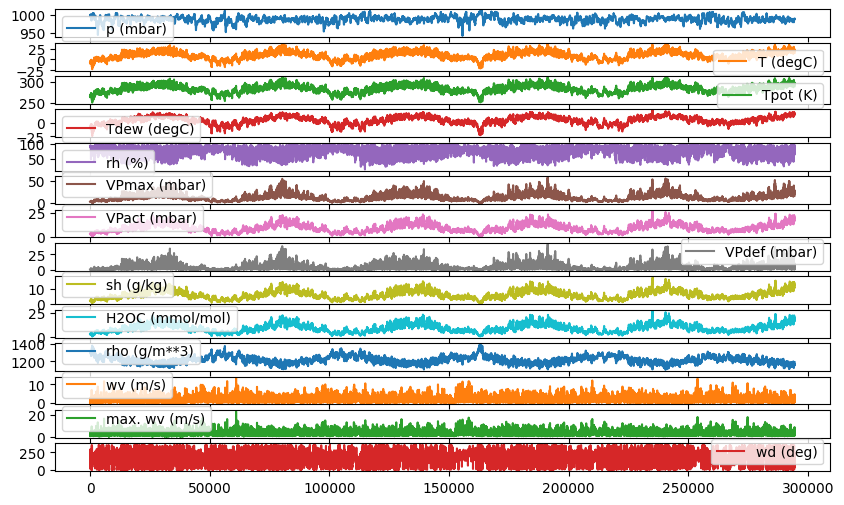

In [76]:
# Let's plot the data 
train_df.plot(subplots=True)

In [78]:
# Let's normalize the data 
# we will use the mean and standard deviation of the training data to normalize the data 
train_mean = train_df.mean()
train_std = train_df.std()

# Let's Normalize the training data
train_df = (train_df-train_mean) / train_std
val_df = (val_df-train_mean) / train_std
test_df = (test_df-train_mean) / train_std


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

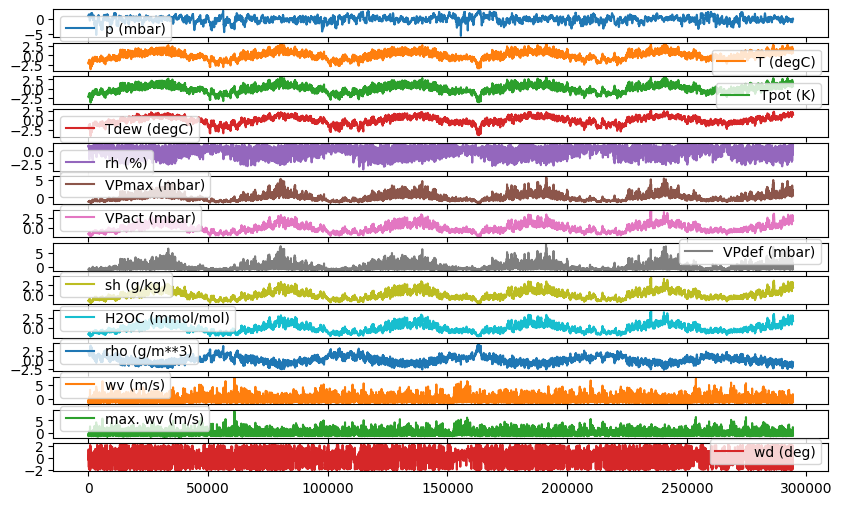

In [79]:
# Let's plot the data 
train_df.plot(subplots=True)